In [1]:
import torch
from TabFairGAN import tabfairgan

/home/arsalan/anaconda3/envs/tabfair/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda:0" if (torch.cuda.is_available() and 1 > 0) else "cpu")

In [3]:
device

device(type='cuda', index=0)

In [4]:
import pandas as pd
df = pd.read_csv("adult/adult.csv")

In [7]:
fairness_config = {
    'fair_epochs': 5,
    'lamda': 0.5,
    'S': 'sex',
    'Y': 'income',
    'S_under': ' Female',
    'Y_desire': ' >50K'
}

tfg = tabfairgan(df, epochs=10, batch_size=256, device="cuda:0", fairness_config=fairness_config)

In [8]:
tfg.S_under

' Female'

In [9]:
tfg.train()

Training Progress:   0%|                              | 0/10 [00:00<?, ?it/s, Training for accuracy]

epoch 1


Training Progress:  10%|██▏                   | 1/10 [00:01<00:10,  1.18s/it, Training for accuracy]

epoch 2


Training Progress:  20%|████▍                 | 2/10 [00:02<00:08,  1.00s/it, Training for accuracy]

epoch 3


Training Progress:  30%|██████▌               | 3/10 [00:02<00:06,  1.04it/s, Training for accuracy]

epoch 4


Training Progress:  40%|████████▊             | 4/10 [00:03<00:05,  1.05it/s, Training for accuracy]

epoch 5


Training Progress:  50%|███████████           | 5/10 [00:04<00:04,  1.10it/s, Training for fairness]

epoch 6


Training Progress:  60%|█████████████▏        | 6/10 [00:05<00:03,  1.10it/s, Training for fairness]

epoch 7


Training Progress:  70%|███████████████▍      | 7/10 [00:06<00:02,  1.08it/s, Training for fairness]

epoch 8


Training Progress:  80%|█████████████████▌    | 8/10 [00:07<00:01,  1.04it/s, Training for fairness]

epoch 9


Training Progress:  90%|███████████████████▊  | 9/10 [00:08<00:00,  1.04it/s, Training for fairness]

epoch 10


Training Progress: 100%|█████████████████████| 10/10 [00:09<00:00,  1.04it/s, Training for fairness]


In [10]:
fake_df = tfg.generate_fake_df(20000)

(array([0.00450432, 0.00694757, 0.02335422, 0.01895909, 0.0337005 ,
        0.21544299, 0.17661029, 0.02185278, 0.14580348, 0.01949142]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

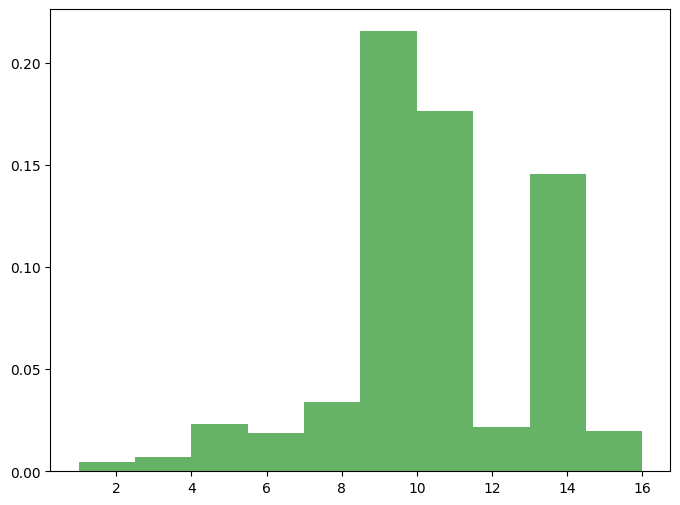

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['education-num'], bins=10, density=True, alpha=0.6, color='g')

(array([0.16486667, 0.00336667, 0.0126    , 0.01      , 0.0194    ,
        0.1387    , 0.11686667, 0.01353333, 0.07376667, 0.11356667]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

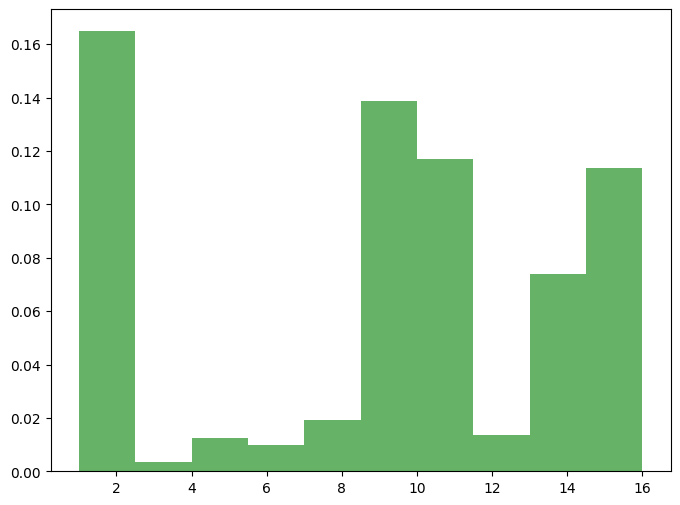

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(fake_df['education-num'], bins=10, density=True, alpha=0.6, color='g')